In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mxp_tools.labs.watt_balance
import scipy.signal
from importlib import reload

reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('data/20190503-vel-7.csv', [1,-1])
V.process()
# display(V.data['shifted'].shape)
plt.show()

/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:173: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  position = data[0].as_matrix()
/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:174: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  voltage = data[2].as_matrix()
/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_raw = raw_data[1].as_matrix()
/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:189: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_raw = raw_data[3].as_matrix()


[8.7  8.7  8.71 ... 8.27 8.27 8.26]
[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]
[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]
shift: 11


<Figure size 640x480 with 1 Axes>

<Figure size 1500x1000 with 4 Axes>

<Figure size 640x480 with 1 Axes>

[8.7  8.7  8.71 ... 8.27 8.27 8.26]
[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]


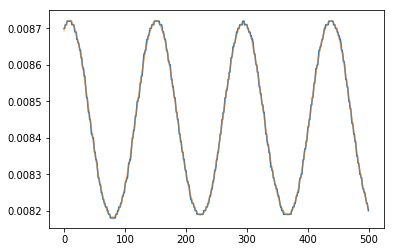

[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]


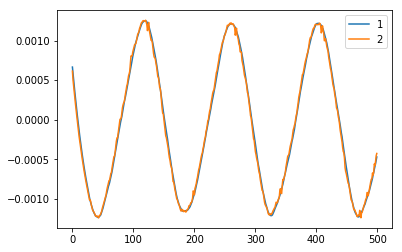

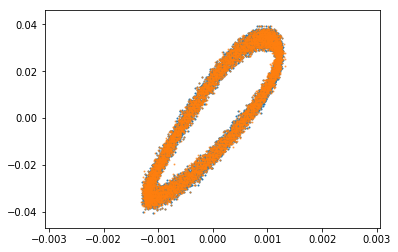

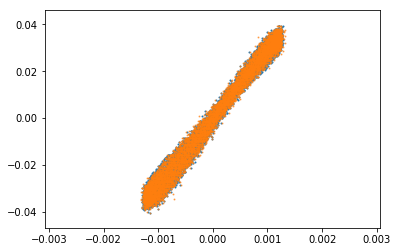

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

V.data.stage1
xy, xt = V.data.load_data()
x = xy[:,0]
xp = scipy.signal.savgol_filter(x, 51, 3)

xp
t = np.arange(xp.shape[0])
i = np.arange(500)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[i], x[i])
ax.plot(t[i], xp[i], alpha=.5)
plt.show()

xyp = np.array([xp, xy[:,1]]).T
dxyp = V.data._velocity_diff(xyp, xt)
dxy = np.array([V.data._velocity_savgol(xy[:,0]), xy[:,1]]).T

dxyp.shape
dxy.shape

fig = plt.figure()
ax = fig.add_subplot(111)

# t[i].shape, dxy[i].shape
ax.plot(t[i], dxy[i,0])
ax.plot(t[i], dxyp[i,0])
ax.legend(['1', '2'])
plt.show()


plt.scatter(dxy[:,0], dxy[:,1], s=1)
plt.scatter(dxyp[:,0], dxyp[:,1], s=1, alpha=0.6)
plt.show()


dxy = V.data._data_shift(dxy, 12)
dxyp = V.data._data_shift(dxyp, 12)

plt.scatter(dxy[:,0], dxy[:,1], s=1)
plt.scatter(dxyp[:,0], dxyp[:,1], s=1, alpha=0.6)
plt.show()

array([[ 0.00058285, -0.00302   ],
       [ 0.00050221, -0.00796   ],
       [ 0.00042337, -0.0103    ],
       ...,
       [-0.00093495, -0.0168    ],
       [-0.00088807, -0.0165    ],
       [-0.00083827, -0.0109    ]])

[8.7  8.7  8.71 ... 8.27 8.27 8.26]
[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]


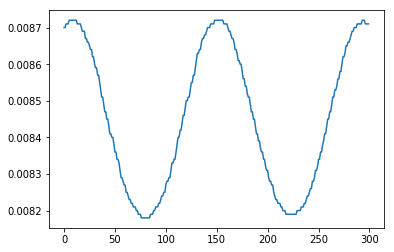

In [3]:
V.data.stage1
xy, xt = V.data.load_data()
x = xy[:,0]

t = np.arange(x.shape[0])
i = np.arange(300)
plt.plot(t[i], x[i])
plt.show()

array([[ 0.00058285, -0.00302   ],
       [ 0.00050221, -0.00796   ],
       [ 0.00042337, -0.0103    ],
       ...,
       [-0.00093495, -0.0168    ],
       [-0.00088807, -0.0165    ],
       [-0.00083827, -0.0109    ]])

[8.7  8.7  8.71 ... 8.27 8.27 8.26]
[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]


((9346,), (9344, 2))

[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]


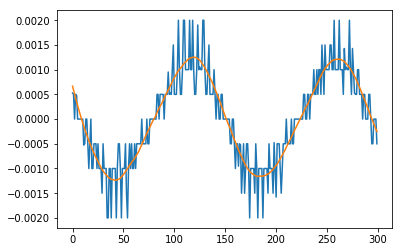

In [4]:
V.data.stage1
xy, xt = V.data.load_data()
x = xy[:,0]
dx = V.data._velocity_diff(xy, xt)
x.shape, dx.shape
dx2 = np.array([V.data._velocity_savgol(xy[:,0]), xy[:,1]]).T

t = np.arange(dx.shape[0])
i = np.arange(300)
plt.plot(t[i], dx[i,0])
plt.plot(t[i], dx2[i,0])
plt.show()

[8.7  8.7  8.71 ... 8.27 8.27 8.26]
[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]


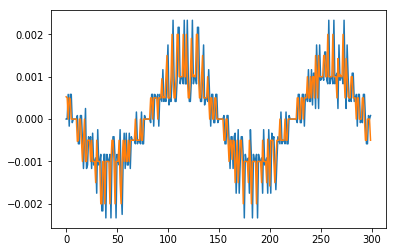

In [5]:
h = 0.01
def diff(x):
    dx = np.zeros_like(x)
    for i in np.arange(2, x.shape[0]-2):
        dx[i] = (-x[i+2]+8*x[i+1]-8*x[i-1]+x[i-2])/(12*h)
    return dx

xy, xt = V.data.load_data()
dx = diff(xy[:,0])
dx2 = V.data._velocity_diff(xy, xt)

t = np.arange(dx.shape[0])
i = np.arange(300)
plt.plot(t[i], dx[i])
plt.plot(t[i], dx2[i,0])
plt.show()

[8.7  8.7  8.71 ... 8.27 8.27 8.26]
[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]


array([0., 0., 0., ..., 0., 0., 0.])

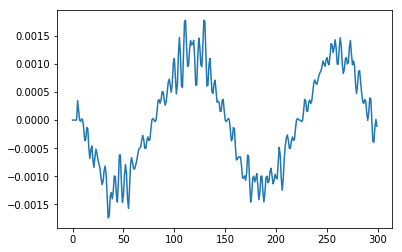

In [6]:
h = 0.01
def diff(x):
    dx = np.zeros_like(x)
    n = [322, 256, 39, -32, -11]
    for i in np.arange(5, x.shape[0]-5):
        for j in np.arange(len(n)):
            j += 1
#             print(j)
            dx[i] += n[j-1]*(x[i+j]-x[i-j])
#         dx[i] = 42*(x[i+1]-x[i-1])+18*(x[i+2])
        dx[i]/= (1536*h)
    return dx

xy, xt = V.data.load_data()
dx = diff(xy[:,0])
dx
dx2 = V.data._velocity_diff(xy, xt)

t = np.arange(dx.shape[0])
i = np.arange(300)
plt.plot(t[i], dx[i])
# plt.plot(t[i], dx2[i,0])
plt.show()

[8.7  8.7  8.71 ... 8.27 8.27 8.26]
[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]


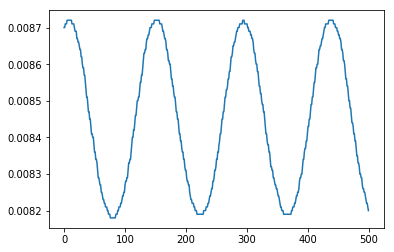

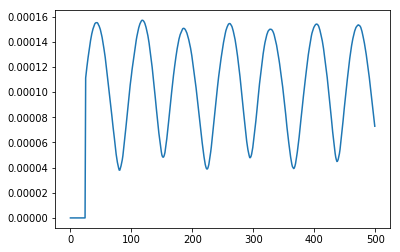

0.00010484337254395169

3.863378760566105e-05

0.007413545968829571

0.007413545968829573

In [7]:
xy, xt = V.data.load_data()
x = xy[:,0]

xe = np.zeros_like(x)
for i in np.arange(25, x.shape[0]-25):
    xe[i] = np.std(x[i-25:i+25])

plt.plot(x[:500])
plt.show()

plt.plot(xe[:500])
plt.show()

np.mean(xe)
np.std(xe)

np.mean(np.sqrt(2*xe**2/(2*0.01)**2))
xe = np.mean(xe)
np.mean(np.sqrt(2*xe**2/(2*0.01)**2))


[8.7  8.7  8.71 ... 8.27 8.27 8.26]
[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]


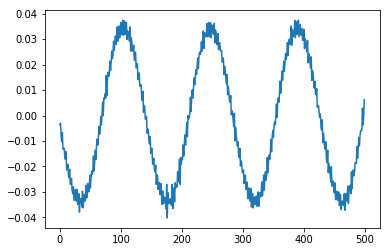

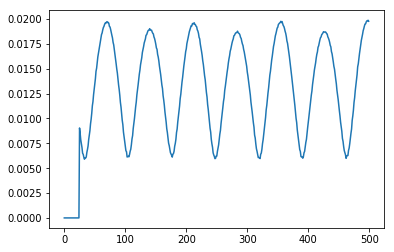

0.01344646785833157

0.004649867041004224

0.9508088605633206

0.9508088605633205

In [8]:
xy, xt = V.data.load_data()
x = xy[:,1]

xe = np.zeros_like(x)
for i in np.arange(25, x.shape[0]-25):
    xe[i] = np.std(x[i-25:i+25])
plt.plot(x[:500])
plt.show()

plt.plot(xe[:500])
plt.show()

np.mean(xe)
np.std(xe)

np.mean(np.sqrt(2*xe**2/(2*0.01)**2))
xe = np.mean(xe)
np.mean(np.sqrt(2*xe**2/(2*0.01)**2))


In [9]:
reload(mxp_tools.labs.watt_balance)
VelocityMode = mxp_tools.labs.watt_balance.VelocityMode

V = VelocityMode('data/20190503-vel-7.csv', [1,-1])
V.data.process()
V.summary()


<module 'mxp_tools.labs.watt_balance' from '/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py'>

[8.7  8.7  8.71 ... 8.27 8.27 8.26]
[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]
[0.0087  0.0087  0.00871 ... 0.00827 0.00827 0.00826]
shift: 11


{'shift': 11, 'mean_pos': 8.3862, 'slope': 2.5172e+01 +_ 1.4521e-01 None}

In [10]:
import os
data = []
# for i in range(7,17):
for f in os.listdir('data'):
    if f.endswith('.csv') and 'vel' in f:
#         f = '20190503-vel-%d.csv' % i
#       if os.path.isfile(f):
        print(f)
        f = 'data/'+f
        V = VelocityMode(f, [1,-1])
        V.data.process()
        data.append({'f': f, **V.summary()})

20190429-vel-10.csv
[5.62 5.83 5.91 ... 5.91 5.91 5.89]
[0.00562 0.00583 0.00591 ... 0.00591 0.00591 0.00589]
[0.00562 0.00583 0.00591 ... 0.00591 0.00591 0.00589]
shift: 11
20190429-vel-11.csv
[5.57 5.88 5.88 ... 6.01 6.01 6.01]
[0.00557 0.00588 0.00588 ... 0.00601 0.00601 0.00601]
[0.00557 0.00588 0.00588 ... 0.00601 0.00601 0.00601]
shift: 11
20190429-vel-12.csv
[5.68 5.9  5.81 ... 5.77 5.77 5.77]
[0.00568 0.0059  0.00581 ... 0.00577 0.00577 0.00577]
[0.00568 0.0059  0.00581 ... 0.00577 0.00577 0.00577]
shift: 11
20190429-vel-13.csv
[5.74 5.87 5.81 ... 5.58 5.6  5.6 ]
[0.00574 0.00587 0.00581 ... 0.00558 0.0056  0.0056 ]
[0.00574 0.00587 0.00581 ... 0.00558 0.0056  0.0056 ]
shift: 12
20190429-vel-14.csv
[5.87 5.72 5.95 ... 5.91 5.9  5.89]
[0.00587 0.00572 0.00595 ... 0.00591 0.0059  0.00589]
[0.00587 0.00572 0.00595 ... 0.00591 0.0059  0.00589]
shift: 11
20190429-vel-1.csv
[7.99 4.39 4.87 ... 7.1  7.12 7.12]
[0.00799 0.00439 0.00487 ... 0.0071  0.00712 0.00712]
[0.00799 0.00439 0.00

<ErrorbarContainer object of 3 artists>

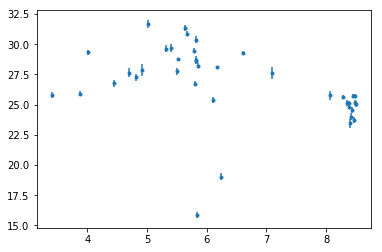

In [11]:
from pandas import DataFrame
df = DataFrame(data)

xy = [(item['mean_pos'], item['slope'].value, item['slope'].err) for item in data]
# x = [item['mean_pos'] for item in data]
# y = [item['slope'].value for item in data]
x, y, yerr = zip(*xy)
x = np.array(x)
y = np.array(y)
yerr = np.array(yerr)
plt.errorbar(x, y, yerr, fmt='.')

<module 'mxp_tools.fit' from '/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/fit.py'>

array([0.19879566, 0.21085264, 0.21303179, 0.2610853 , 0.27882523,
       0.12510851, 5.81769928, 0.29798869, 0.48374769, 0.30776361,
       0.31084836, 0.21974683, 0.25117199, 0.33490282, 0.14430036,
       0.12513861, 0.168002  , 0.20900791, 0.23559762, 0.26940518,
       0.24283752, 0.27595493, 0.29561297, 0.48635704, 0.3912156 ,
       0.33990712, 0.14521489, 0.18301649, 0.26290369, 0.20595356,
       0.26115398, 0.06195498, 0.23586905, 0.24828916, 0.28665819,
       0.13479779, 0.37354065, 4.84636317, 0.18993362])

Help on class Analysis in module mxp_tools.fit:

class Analysis(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, model, x, y, yerr)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  plot(self, ax, ebar_args=None, plot_ebars=True)
 |  
 |  plot_chi(self, ax)
 |  
 |  plot_chi2(self, ax)
 |  
 |  ----------------------------------------------------------------------
 |  Class methods defined here:
 |  
 |  new(x, y, yerr, fit) from builtins.type
 |  
 |  new_2param(x, y, yerr) from builtins.type
 |  
 |  ----------------------------------------------------------------------
 |  Static methods defined here:
 |  
 |  lsq_fit(x, y, ey)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defin

params [-0.49698978  5.65125096 12.78817673] param errors [0.08571614 1.13897392 3.63640735]
Reduced chi^2: 29.58
PTE: 1.0000


24.916298297331537

0.024518844462645406

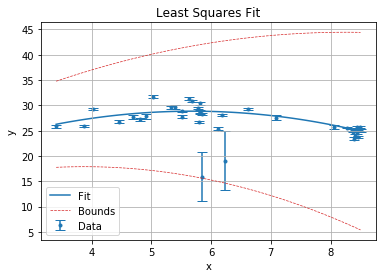

In [12]:
# x = np.array(x)
# del i
# i = np.where(np.abs(x-8.5)<1)[0]
# plt.errorbar(x[i], y[i], yerr[i], fmt='.')
# x

import mxp_tools.fit
reload(mxp_tools.fit)
Analysis = mxp_tools.fit.Analysis

yerr2 = yerr
yerr2[np.where(y<20)] *= 20
yerr2

def fit(x, a, b, c):
    return a*x**2+b*x+c

help(Analysis)
analysis = Analysis.new(x, y, yerr2, fit)
# analysis = Analysis.new_2param(x[i], y[i], yerr[i])
analysis.plot(plt.figure().add_subplot(111))
print(analysis)
analysis.model(8.5)
(analysis.model(8.5)-24.32)/24.32

In [13]:
fnames = os.listdir('data')
fnames = ['data/'+f for f in fnames if (f.endswith('.csv') and 'vel' in f)]
fnames = np.array(fnames)
fnames[np.where(y<20)]
DataFrame(data)

array(['data/20190429-vel-2.csv', 'data/vel-3-20190426.csv'], dtype='<U24')

f  mean_pos  shift                          slope
0   data/20190429-vel-10.csv  5.778450     11  2.9453e+01 +_ 1.9880e-01 None
1   data/20190429-vel-11.csv  5.848400     11  2.8234e+01 +_ 2.1085e-01 None
2   data/20190429-vel-12.csv  5.804200     11  2.6749e+01 +_ 2.1303e-01 None
3   data/20190429-vel-13.csv  5.814400     12  2.8597e+01 +_ 2.6109e-01 None
4   data/20190429-vel-14.csv  5.815900     11  2.8735e+01 +_ 2.7883e-01 None
5    data/20190429-vel-1.csv  6.613200     11  2.9306e+01 +_ 1.2511e-01 None
6    data/20190429-vel-2.csv  6.235400     10  1.9044e+01 +_ 2.9088e-01 None
7    data/20190429-vel-3.csv  5.320150     11  2.9622e+01 +_ 2.9799e-01 None
8    data/20190429-vel-4.csv  4.914550     12  2.7871e+01 +_ 4.8375e-01 None
9    data/20190429-vel-5.csv  5.816550     11  3.0376e+01 +_ 3.0776e-01 None
10   data/20190429-vel-6.csv  5.022000     11  3.1679e+01 +_ 3.1085e-01 None
11   data/20190429-vel-7.csv  5.676200     11  3.0872e+01 +_ 2.1975e-01 None
12   data/20190429-vel-8.csv  5.632600     11  3.1321e+01 +_ 2.5117e-01 None
13   data/20190429-vel-9.csv  5.400850     11  2.9705e+01 +_ 3.3490e-01 None
14  data/20190503-vel-11.csv  8.382150     11  2.4824e+01 +_ 1.4430e-01 None
15  data/20190503-vel-12.csv  8.489800     12  2.5741e+01 +_ 1.2514e-01 None
16  data/20190503-vel-13.csv  8.446300     10  2.5692e+01 +_ 1.6800e-01 None
17  data/20190503-vel-14.csv  8.477500     12  2.5150e+01 +_ 2.0901e-01 None
18  data/20190503-vel-15.csv  8.502250     11  2.5069e+01 +_ 2.3560e-01 None
19  data/20190503-vel-16.csv  8.414050     12  2.4012e+01 +_ 2.6941e-01 None
20  data/20190503-vel-17.csv  8.460900     12  2.3714e+01 +_ 2.4284e-01 None
21  data/20190503-vel-18.csv  8.440250     11  2.4544e+01 +_ 2.7595e-01 None
22   data/20190503-vel-1.csv  5.505950      9  2.7760e+01 +_ 2.9561e-01 None
23   data/20190503-vel-4.csv  7.084400     11  2.7591e+01 +_ 4.8636e-01 None
24   data/20190503-vel-5.csv  8.063350     10  2.5758e+01 +_ 3.9122e-01 None
25   data/20190503-vel-6.csv  8.394950     11  2.3444e+01 +_ 3.3991e-01 None
26   data/20190503-vel-7.csv  8.386200     11  2.5172e+01 +_ 1.4521e-01 None
27   data/20190503-vel-8.csv  8.278500     10  2.5618e+01 +_ 1.8302e-01 None
28   data/20190503-vel-9.csv  8.356200     12  2.5144e+01 +_ 2.6290e-01 None
29   data/vel-1-20190422.csv  3.875815     10  2.5898e+01 +_ 2.0595e-01 None
30   data/vel-1-20190424.csv  4.807200     12  2.7252e+01 +_ 2.6115e-01 None
31   data/vel-1-20190425.csv  5.515750     12  2.8803e+01 +_ 6.1955e-02 None
32   data/vel-1-20190426.csv  6.111246      9  2.5412e+01 +_ 2.3587e-01 None
33   data/vel-2-20190422.csv  3.404000     10  2.5830e+01 +_ 2.4829e-01 None
34   data/vel-2-20190424.csv  4.450000     12  2.6767e+01 +_ 2.8666e-01 None
35   data/vel-2-20190426.csv  6.174441     12  2.8081e+01 +_ 1.3480e-01 None
36   data/vel-3-20190422.csv  4.689100     12  2.7635e+01 +_ 3.7354e-01 None
37   data/vel-3-20190426.csv  5.840346     11  1.5859e+01 +_ 2.4232e-01 None
38  data/velocity-data-1.csv  4.012650     12  2.9338e+01 +_ 1.8993e-01 None

data/20190429-vel-10.csv
[5.62 5.83 5.91 ... 5.91 5.91 5.89]
[0.00562 0.00583 0.00591 ... 0.00591 0.00591 0.00589]
[0.00562 0.00583 0.00591 ... 0.00591 0.00591 0.00589]
shift: 11


{'shift': 11,
 'mean_pos': 5.778450000000001,
 'slope': 2.9453e+01 +_ 1.9880e-01 None}

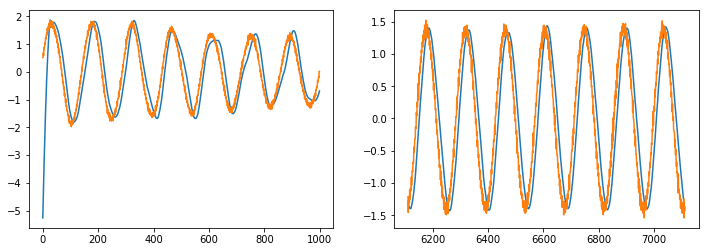

[5.62 5.83 5.91 ... 5.91 5.91 5.89]
[0.00562 0.00583 0.00591 ... 0.00591 0.00591 0.00589]
[0.00562 0.00583 0.00591 ... 0.00591 0.00591 0.00589]
shift: 11


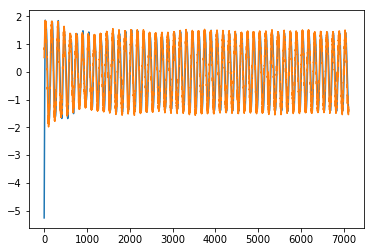

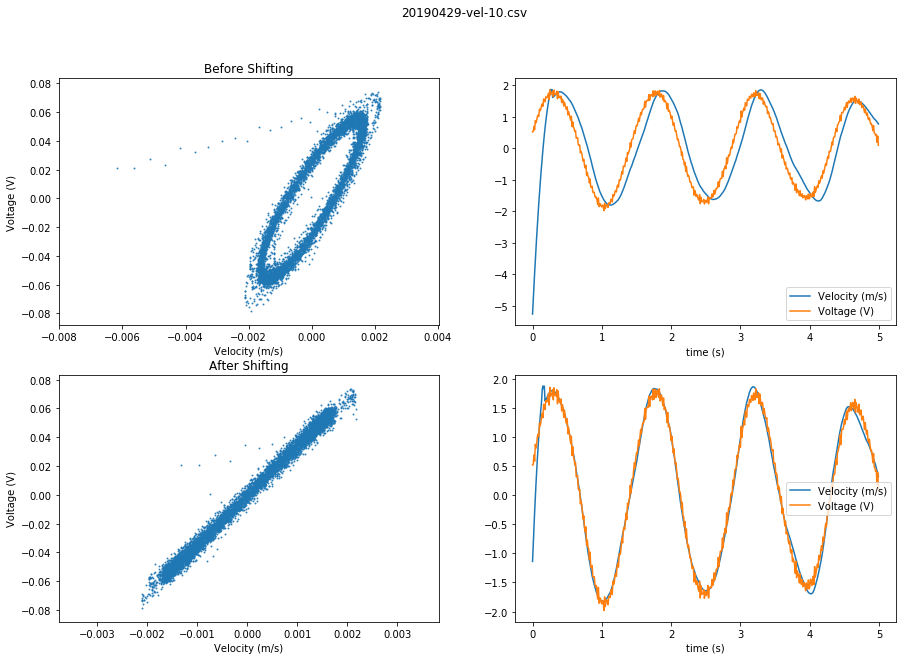

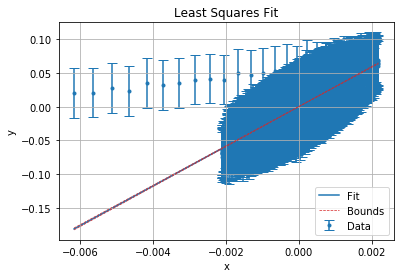

data/20190429-vel-11.csv
[5.57 5.88 5.88 ... 6.01 6.01 6.01]
[0.00557 0.00588 0.00588 ... 0.00601 0.00601 0.00601]
[0.00557 0.00588 0.00588 ... 0.00601 0.00601 0.00601]
shift: 11


{'shift': 11, 'mean_pos': 5.8484, 'slope': 2.8234e+01 +_ 2.1085e-01 None}

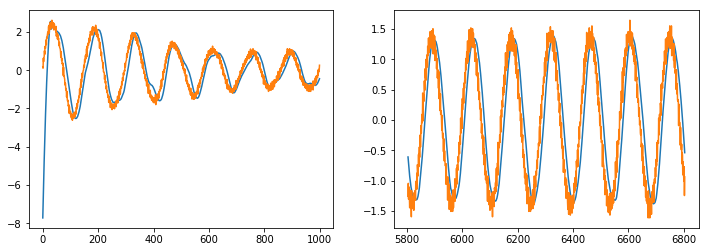

[5.57 5.88 5.88 ... 6.01 6.01 6.01]
[0.00557 0.00588 0.00588 ... 0.00601 0.00601 0.00601]
[0.00557 0.00588 0.00588 ... 0.00601 0.00601 0.00601]
shift: 11


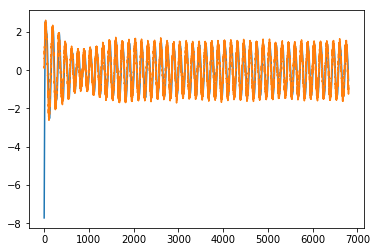

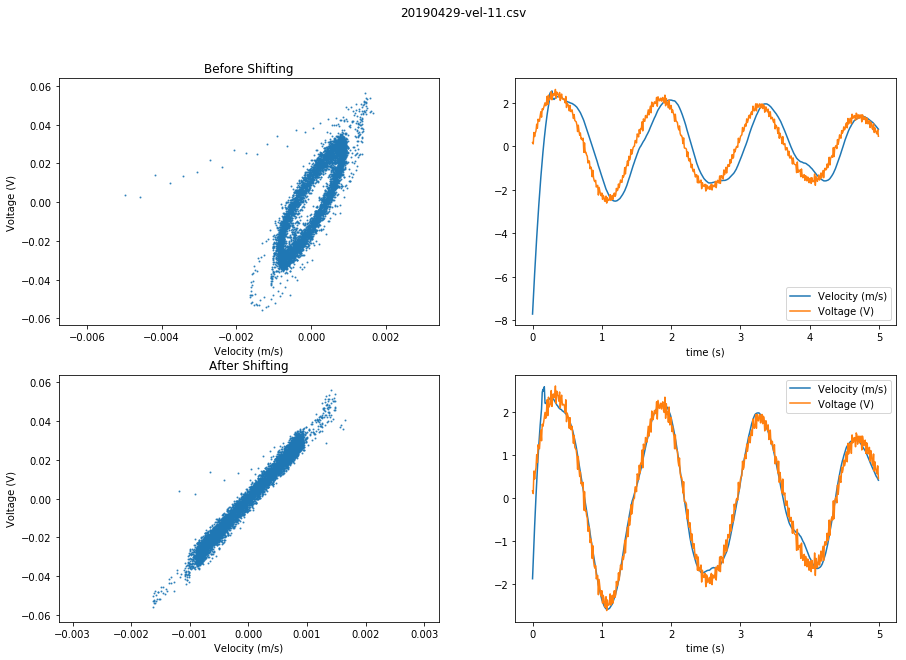

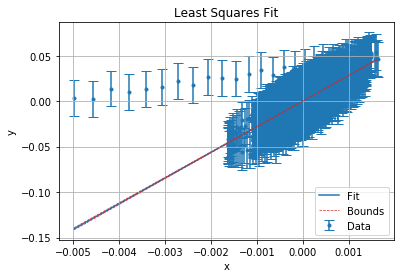

data/20190429-vel-12.csv
[5.68 5.9  5.81 ... 5.77 5.77 5.77]
[0.00568 0.0059  0.00581 ... 0.00577 0.00577 0.00577]
[0.00568 0.0059  0.00581 ... 0.00577 0.00577 0.00577]
shift: 11


{'shift': 11,
 'mean_pos': 5.804200000000001,
 'slope': 2.6749e+01 +_ 2.1303e-01 None}

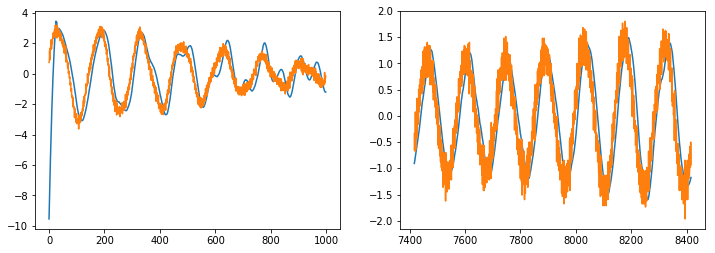

[5.68 5.9  5.81 ... 5.77 5.77 5.77]
[0.00568 0.0059  0.00581 ... 0.00577 0.00577 0.00577]
[0.00568 0.0059  0.00581 ... 0.00577 0.00577 0.00577]
shift: 11


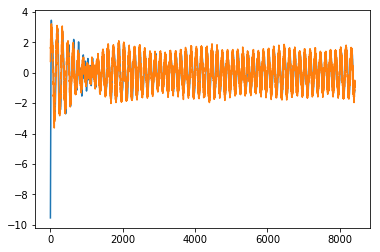

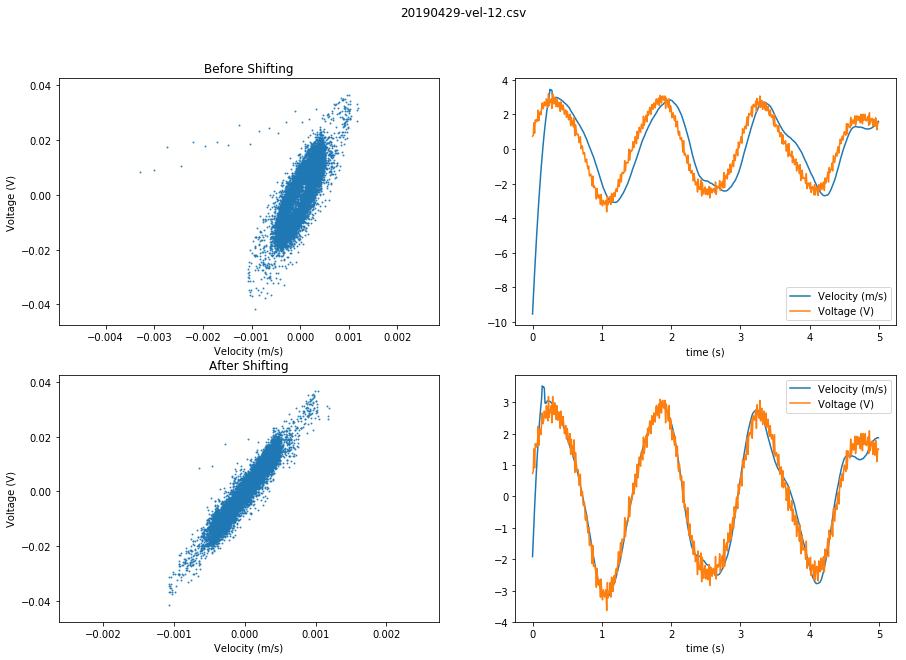

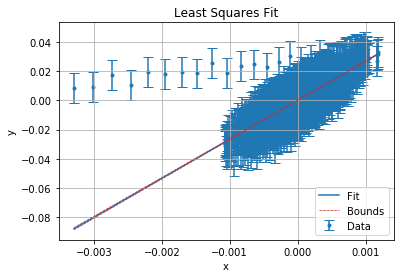

data/20190429-vel-13.csv
[5.74 5.87 5.81 ... 5.58 5.6  5.6 ]
[0.00574 0.00587 0.00581 ... 0.00558 0.0056  0.0056 ]
[0.00574 0.00587 0.00581 ... 0.00558 0.0056  0.0056 ]
shift: 12


{'shift': 12, 'mean_pos': 5.8144, 'slope': 2.8597e+01 +_ 2.6109e-01 None}

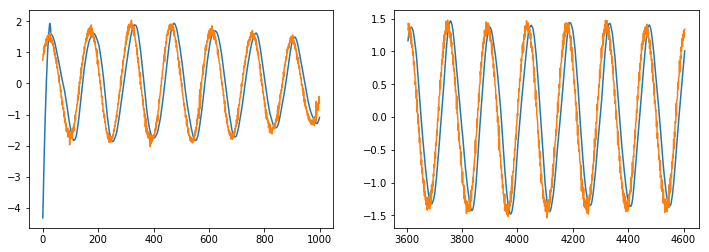

[5.74 5.87 5.81 ... 5.58 5.6  5.6 ]
[0.00574 0.00587 0.00581 ... 0.00558 0.0056  0.0056 ]
[0.00574 0.00587 0.00581 ... 0.00558 0.0056  0.0056 ]
shift: 12


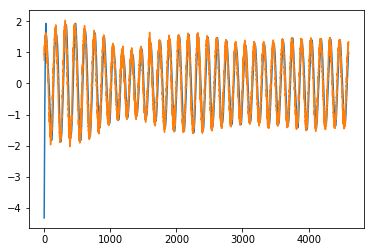

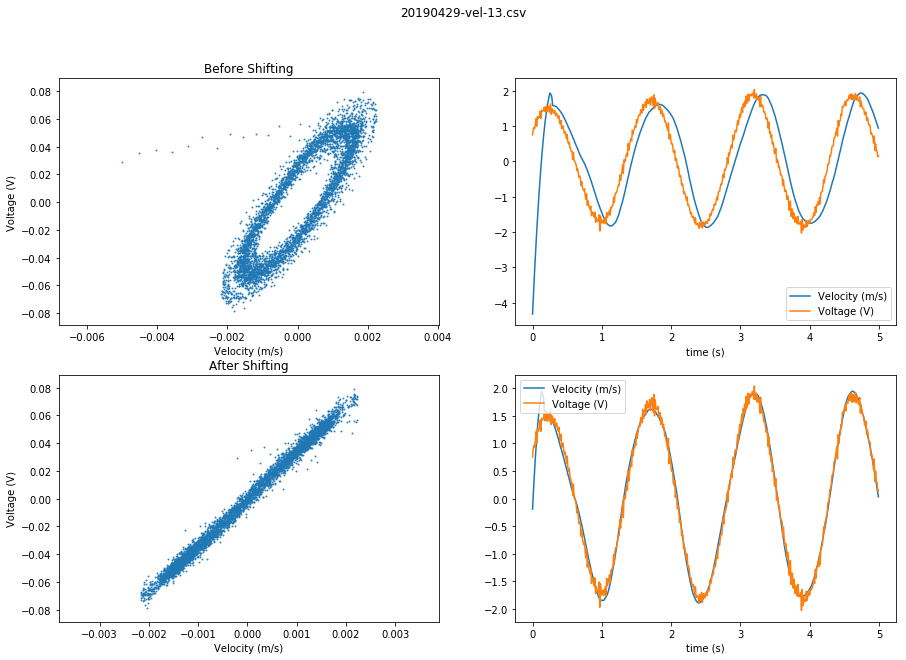

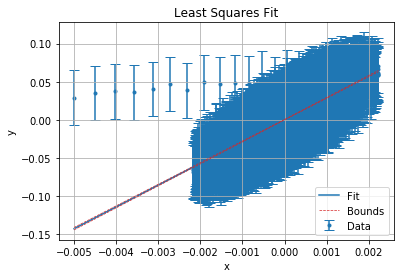

data/20190429-vel-14.csv
[5.87 5.72 5.95 ... 5.91 5.9  5.89]
[0.00587 0.00572 0.00595 ... 0.00591 0.0059  0.00589]
[0.00587 0.00572 0.00595 ... 0.00591 0.0059  0.00589]
shift: 11


{'shift': 11,
 'mean_pos': 5.815900000000001,
 'slope': 2.8735e+01 +_ 2.7883e-01 None}

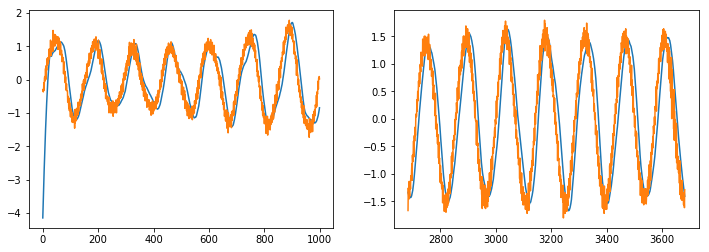

[5.87 5.72 5.95 ... 5.91 5.9  5.89]
[0.00587 0.00572 0.00595 ... 0.00591 0.0059  0.00589]
[0.00587 0.00572 0.00595 ... 0.00591 0.0059  0.00589]
shift: 11


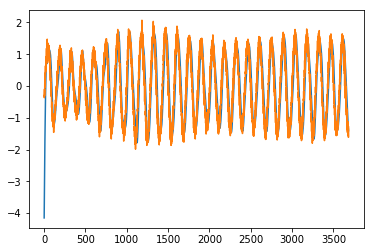

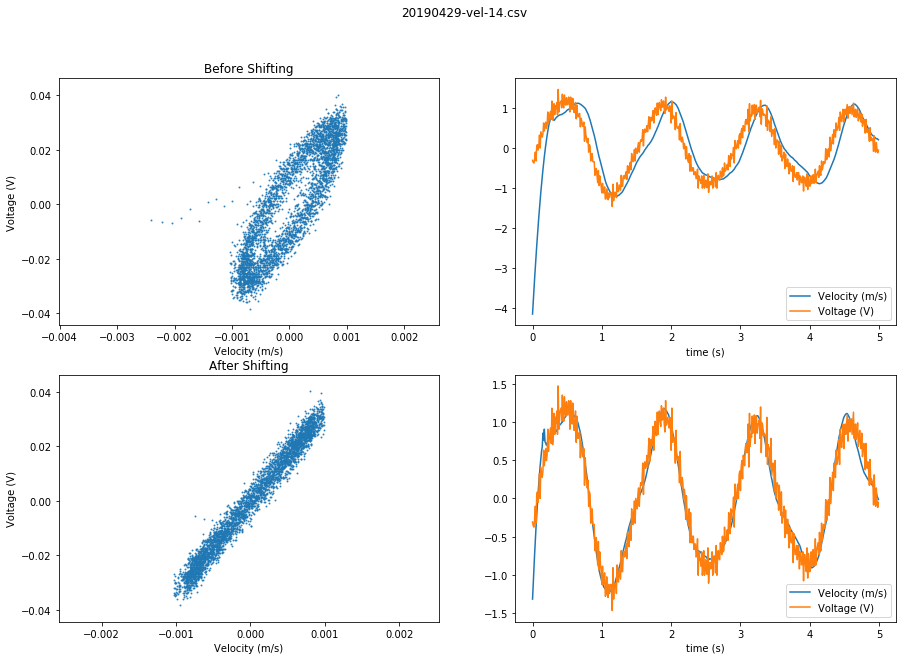

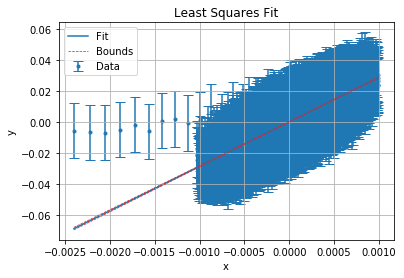

data/20190429-vel-1.csv
[7.99 4.39 4.87 ... 7.1  7.12 7.12]
[0.00799 0.00439 0.00487 ... 0.0071  0.00712 0.00712]
[0.00799 0.00439 0.00487 ... 0.0071  0.00712 0.00712]
shift: 11


{'shift': 11,
 'mean_pos': 6.613200000000001,
 'slope': 2.9306e+01 +_ 1.2511e-01 None}

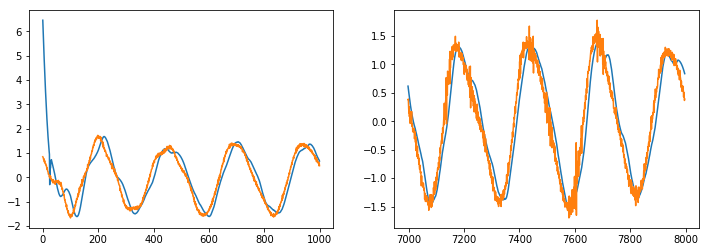

[7.99 4.39 4.87 ... 7.1  7.12 7.12]
[0.00799 0.00439 0.00487 ... 0.0071  0.00712 0.00712]
[0.00799 0.00439 0.00487 ... 0.0071  0.00712 0.00712]
shift: 11


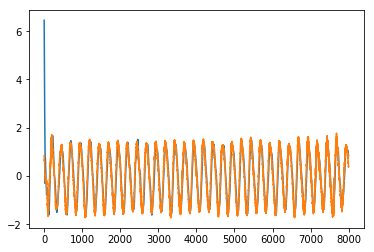

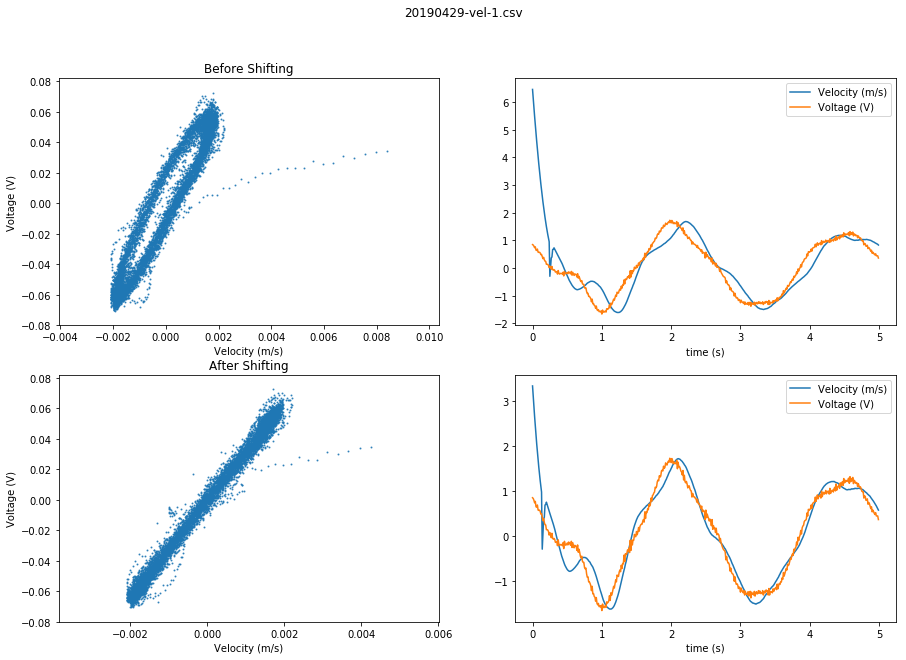

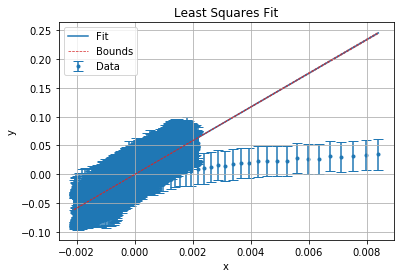

data/20190429-vel-2.csv
[3.97 3.97 6.12 ... 6.86 6.86 6.86]
[0.00397 0.00397 0.00612 ... 0.00686 0.00686 0.00686]
[0.00397 0.00397 0.00612 ... 0.00686 0.00686 0.00686]
shift: 10


{'shift': 10,
 'mean_pos': 6.235399999999999,
 'slope': 1.9044e+01 +_ 2.9088e-01 None}

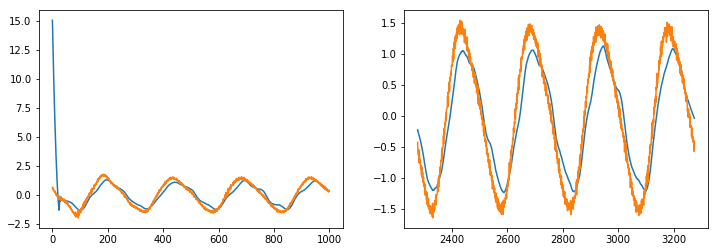

[3.97 3.97 6.12 ... 6.86 6.86 6.86]
[0.00397 0.00397 0.00612 ... 0.00686 0.00686 0.00686]
[0.00397 0.00397 0.00612 ... 0.00686 0.00686 0.00686]
shift: 10


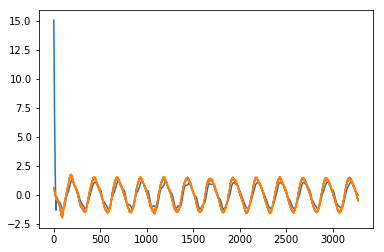

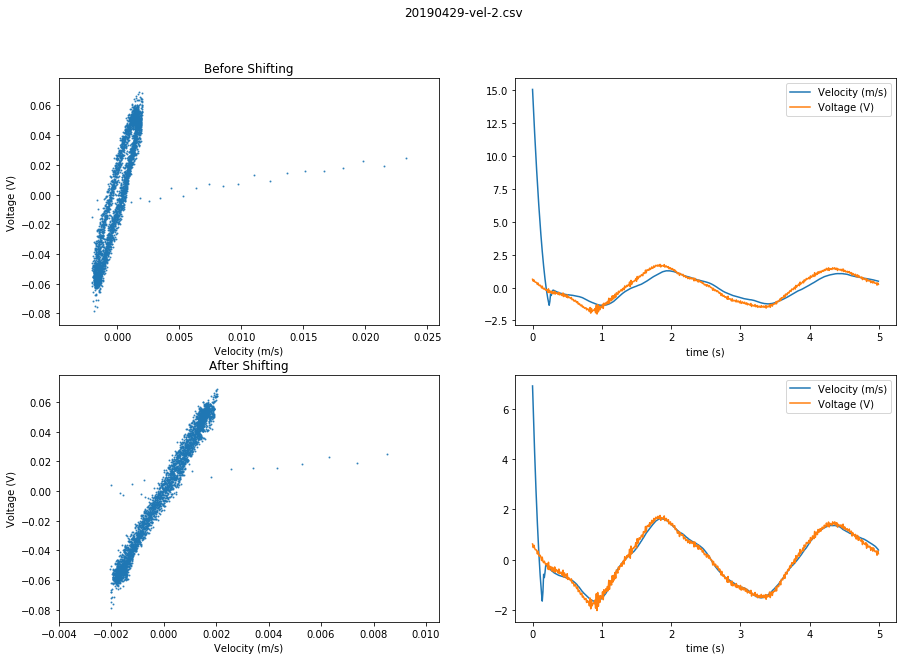

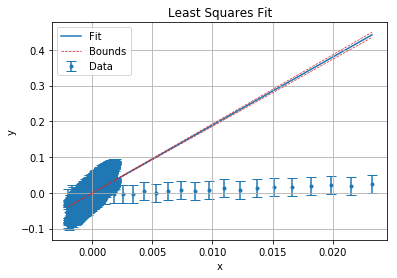

data/20190429-vel-3.csv
[4.87 4.24 5.08 ... 4.95 4.97 4.99]
[0.00487 0.00424 0.00508 ... 0.00495 0.00497 0.00499]
[0.00487 0.00424 0.00508 ... 0.00495 0.00497 0.00499]
shift: 11


{'shift': 11, 'mean_pos': 5.32015, 'slope': 2.9622e+01 +_ 2.9799e-01 None}

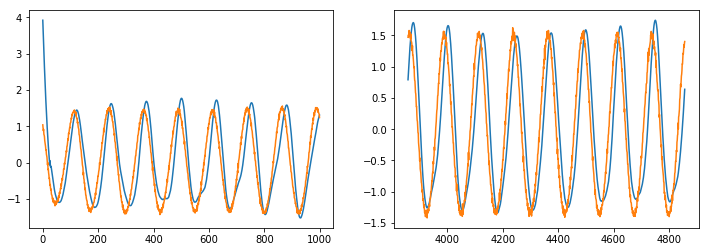

[4.87 4.24 5.08 ... 4.95 4.97 4.99]
[0.00487 0.00424 0.00508 ... 0.00495 0.00497 0.00499]
[0.00487 0.00424 0.00508 ... 0.00495 0.00497 0.00499]
shift: 11


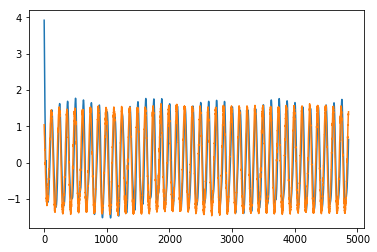

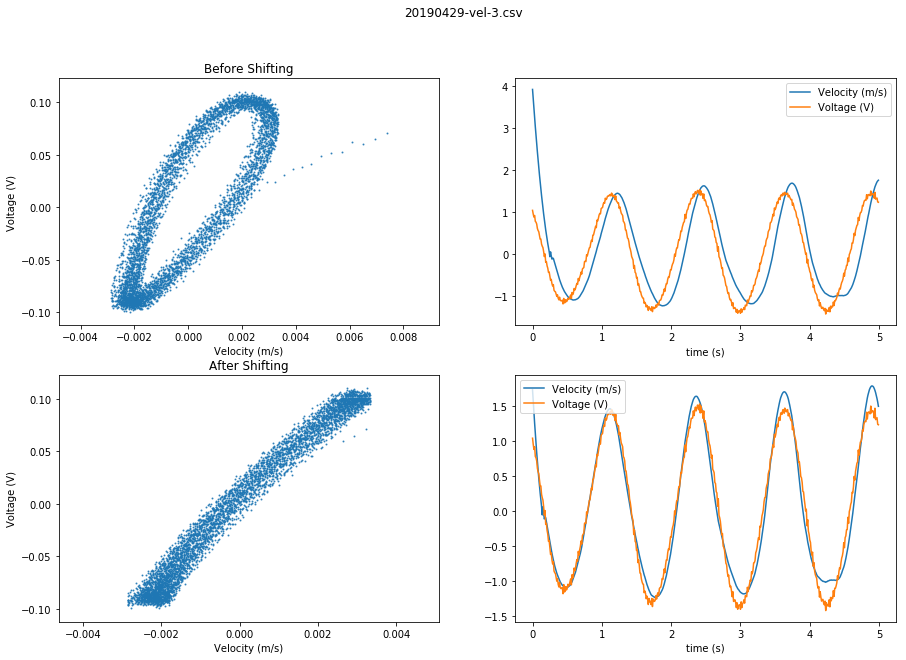

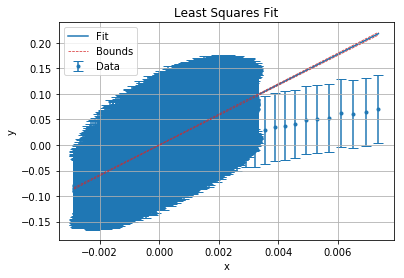

data/20190429-vel-4.csv
[3.79 3.77 4.95 ... 5.01 5.03 5.04]
[0.00379 0.00377 0.00495 ... 0.00501 0.00503 0.00504]
[0.00379 0.00377 0.00495 ... 0.00501 0.00503 0.00504]
shift: 12


{'shift': 12, 'mean_pos': 4.91455, 'slope': 2.7871e+01 +_ 4.8375e-01 None}

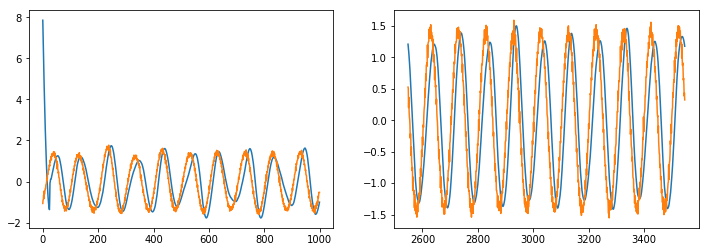

[3.79 3.77 4.95 ... 5.01 5.03 5.04]
[0.00379 0.00377 0.00495 ... 0.00501 0.00503 0.00504]
[0.00379 0.00377 0.00495 ... 0.00501 0.00503 0.00504]
shift: 12


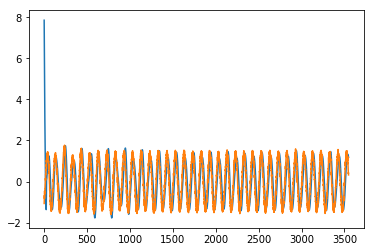

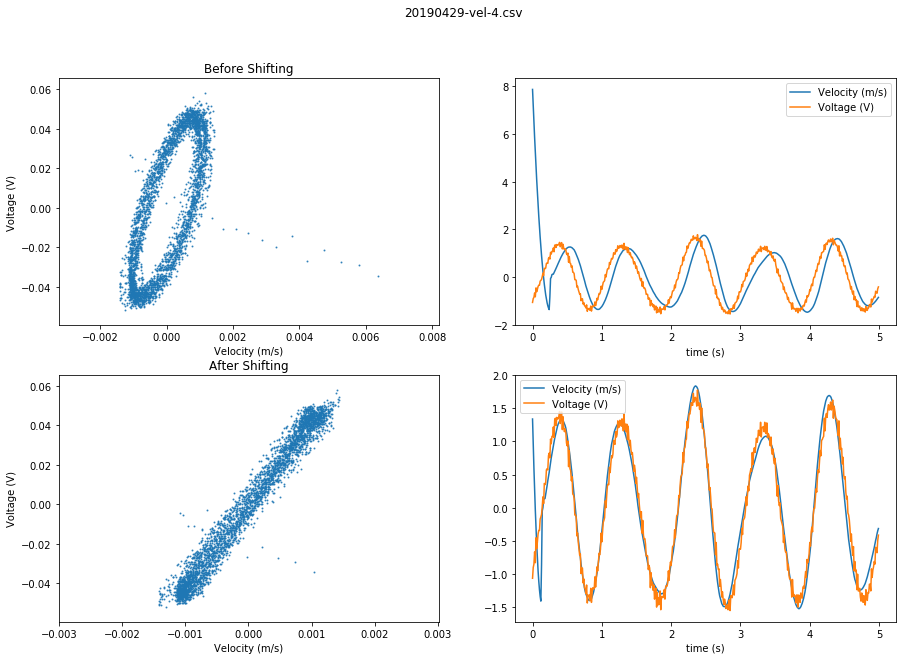

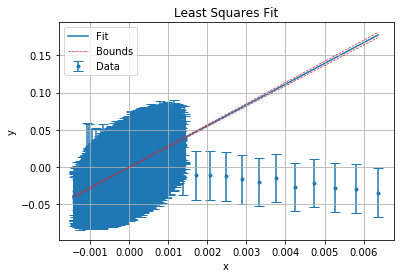

data/20190429-vel-5.csv
[3.42 4.87 5.78 ... 5.17 5.15 5.15]
[0.00342 0.00487 0.00578 ... 0.00517 0.00515 0.00515]
[0.00342 0.00487 0.00578 ... 0.00517 0.00515 0.00515]
shift: 11


{'shift': 11, 'mean_pos': 5.81655, 'slope': 3.0376e+01 +_ 3.0776e-01 None}

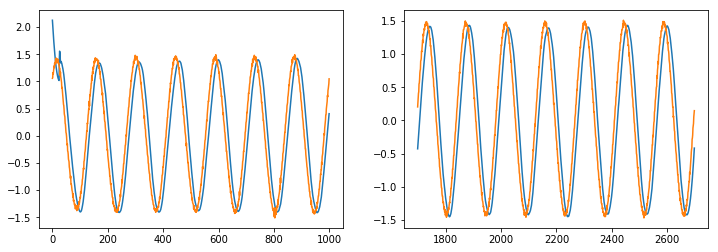

[3.42 4.87 5.78 ... 5.17 5.15 5.15]
[0.00342 0.00487 0.00578 ... 0.00517 0.00515 0.00515]
[0.00342 0.00487 0.00578 ... 0.00517 0.00515 0.00515]
shift: 11


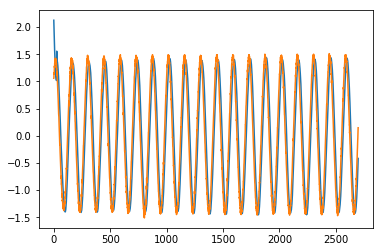

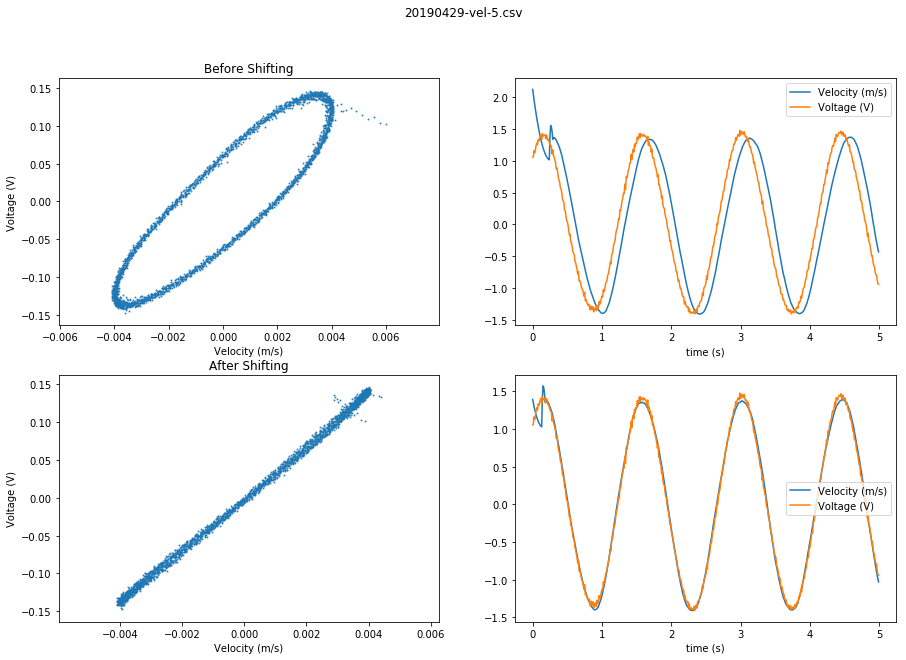

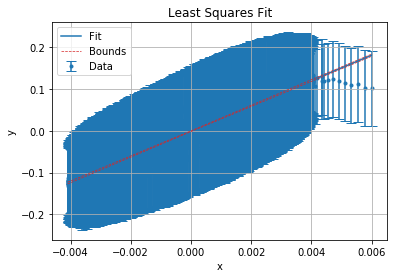

data/20190429-vel-6.csv
[4.64 3.86 5.25 ... 4.84 4.81 4.81]
[0.00464 0.00386 0.00525 ... 0.00484 0.00481 0.00481]
[0.00464 0.00386 0.00525 ... 0.00484 0.00481 0.00481]
shift: 11


{'shift': 11,
 'mean_pos': 5.021999999999999,
 'slope': 3.1679e+01 +_ 3.1085e-01 None}

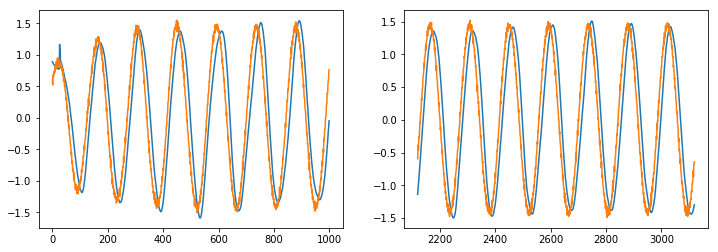

[4.64 3.86 5.25 ... 4.84 4.81 4.81]
[0.00464 0.00386 0.00525 ... 0.00484 0.00481 0.00481]
[0.00464 0.00386 0.00525 ... 0.00484 0.00481 0.00481]
shift: 11


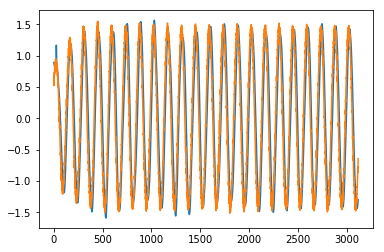

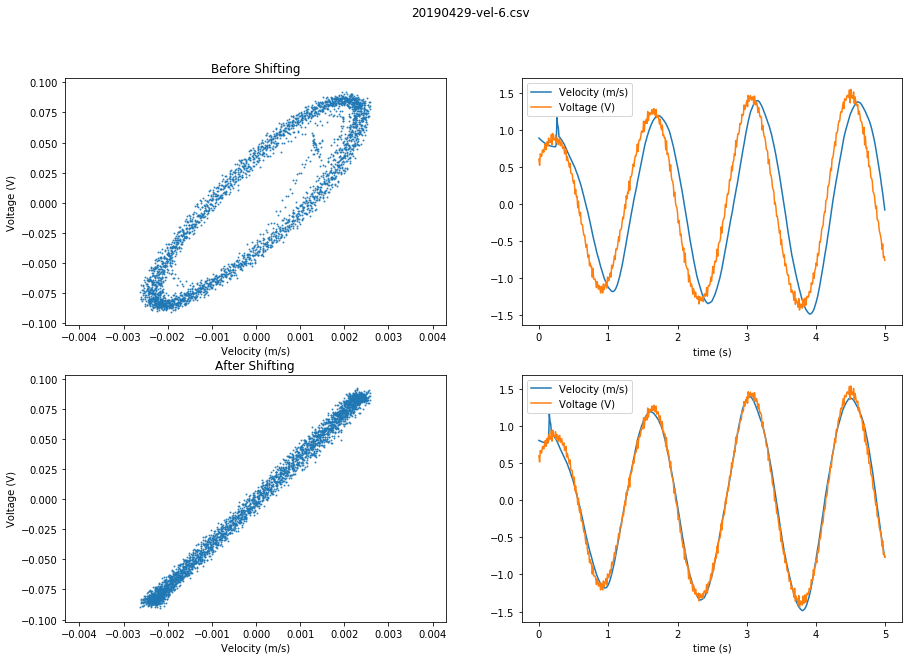

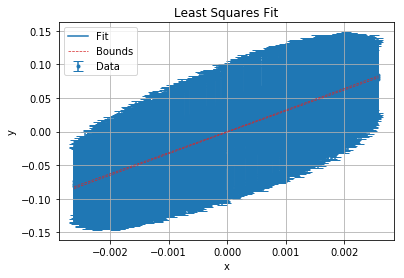

data/20190429-vel-7.csv
[4.09 4.71 5.63 ... 6.34 6.34 6.32]
[0.00409 0.00471 0.00563 ... 0.00634 0.00634 0.00632]
[0.00409 0.00471 0.00563 ... 0.00634 0.00634 0.00632]
shift: 11


{'shift': 11,
 'mean_pos': 5.676200000000001,
 'slope': 3.0872e+01 +_ 2.1975e-01 None}

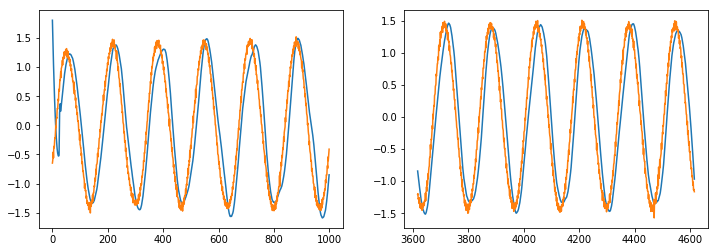

[4.09 4.71 5.63 ... 6.34 6.34 6.32]
[0.00409 0.00471 0.00563 ... 0.00634 0.00634 0.00632]
[0.00409 0.00471 0.00563 ... 0.00634 0.00634 0.00632]
shift: 11


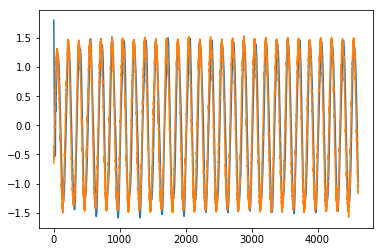

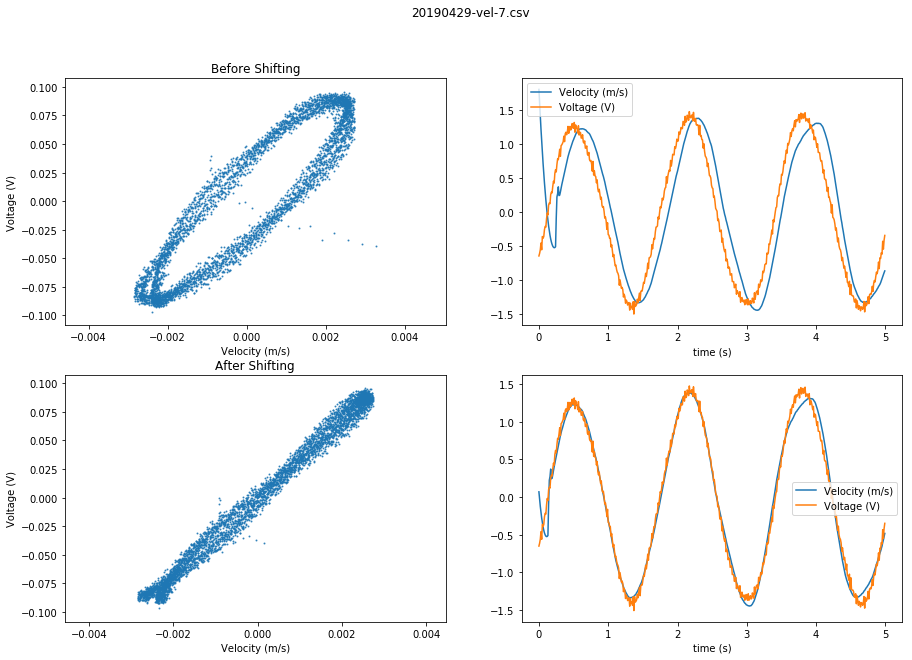

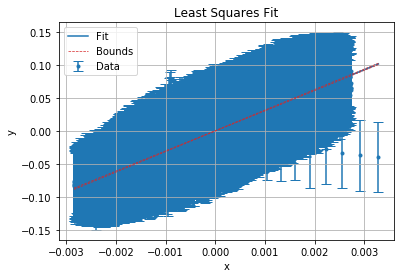

data/20190429-vel-8.csv
[3.74 4.24 5.39 ... 5.9  5.94 5.94]
[0.00374 0.00424 0.00539 ... 0.0059  0.00594 0.00594]
[0.00374 0.00424 0.00539 ... 0.0059  0.00594 0.00594]
shift: 11


{'shift': 11, 'mean_pos': 5.6326, 'slope': 3.1321e+01 +_ 2.5117e-01 None}

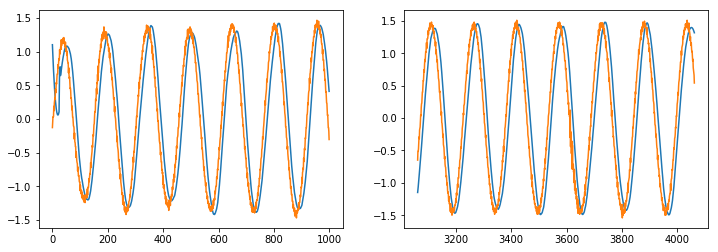

[3.74 4.24 5.39 ... 5.9  5.94 5.94]
[0.00374 0.00424 0.00539 ... 0.0059  0.00594 0.00594]
[0.00374 0.00424 0.00539 ... 0.0059  0.00594 0.00594]
shift: 11


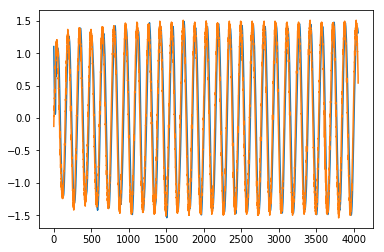

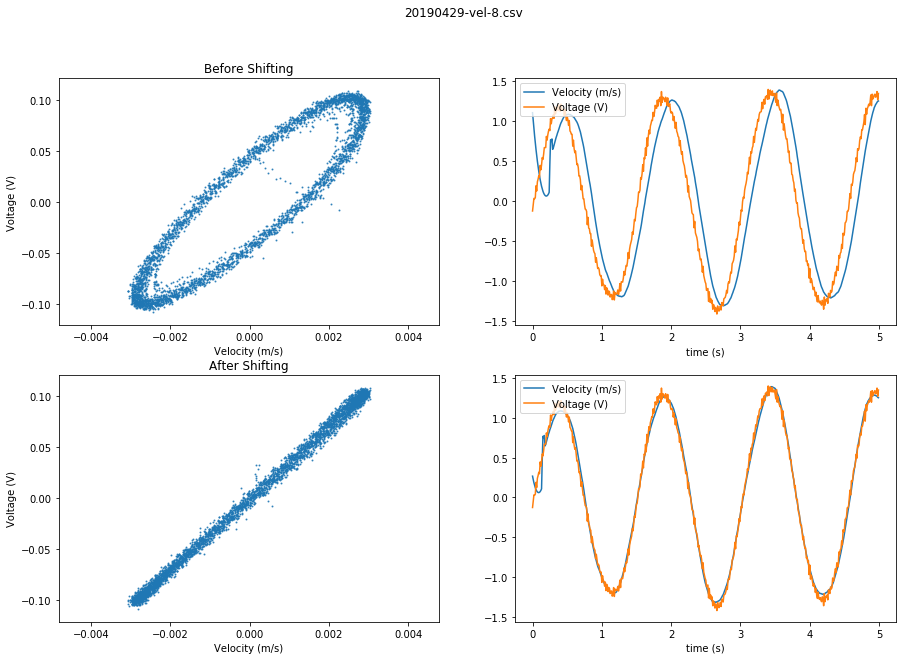

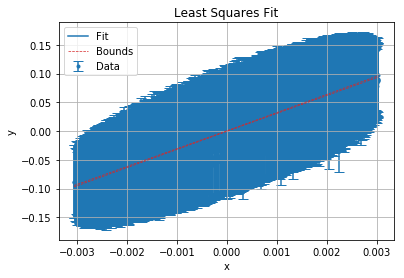

data/20190429-vel-9.csv
[4.31 4.36 5.59 ... 5.49 5.49 5.46]
[0.00431 0.00436 0.00559 ... 0.00549 0.00549 0.00546]
[0.00431 0.00436 0.00559 ... 0.00549 0.00549 0.00546]
shift: 11


{'shift': 11,
 'mean_pos': 5.400849999999999,
 'slope': 2.9705e+01 +_ 3.3490e-01 None}

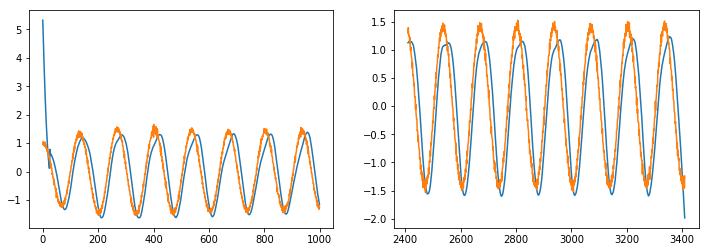

[4.31 4.36 5.59 ... 5.49 5.49 5.46]
[0.00431 0.00436 0.00559 ... 0.00549 0.00549 0.00546]
[0.00431 0.00436 0.00559 ... 0.00549 0.00549 0.00546]
shift: 11


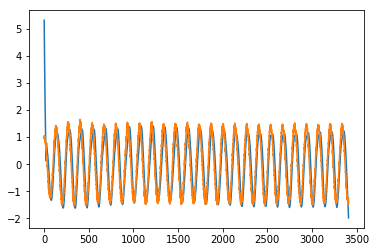

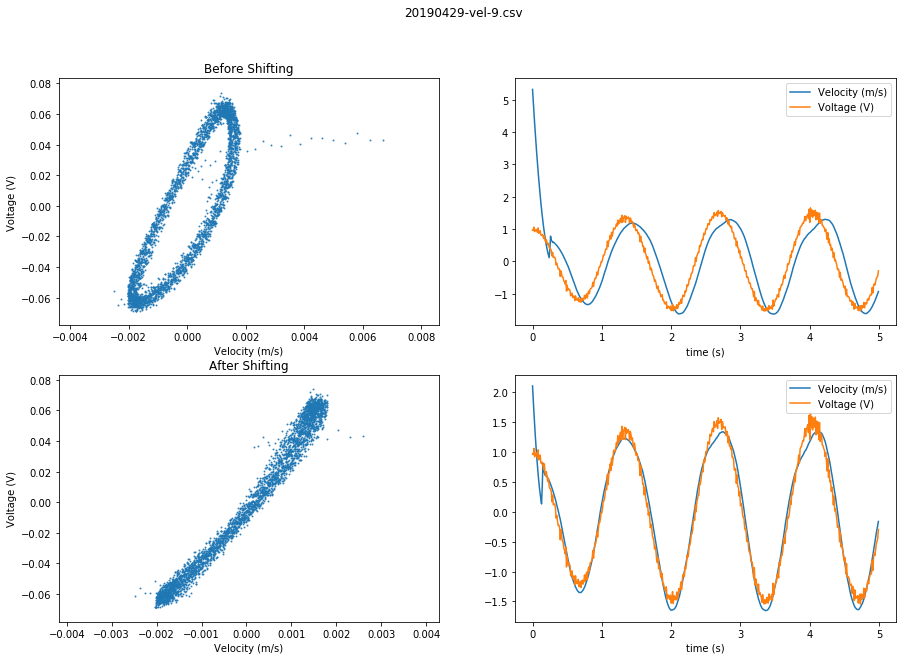

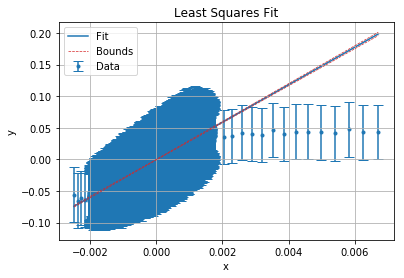

data/20190503-vel-11.csv
[8.59 8.59 8.58 ... 8.38 8.37 8.36]
[0.00859 0.00859 0.00858 ... 0.00838 0.00837 0.00836]
[0.00859 0.00859 0.00858 ... 0.00838 0.00837 0.00836]
shift: 11


{'shift': 11, 'mean_pos': 8.38215, 'slope': 2.4824e+01 +_ 1.4430e-01 None}

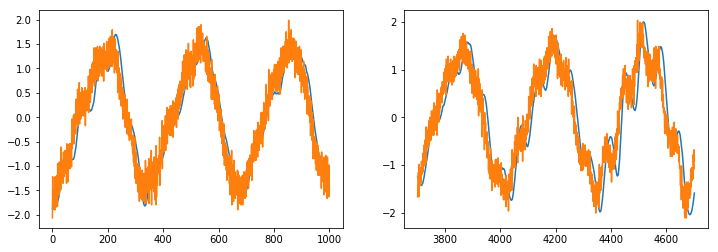

[8.59 8.59 8.58 ... 8.38 8.37 8.36]
[0.00859 0.00859 0.00858 ... 0.00838 0.00837 0.00836]
[0.00859 0.00859 0.00858 ... 0.00838 0.00837 0.00836]
shift: 11


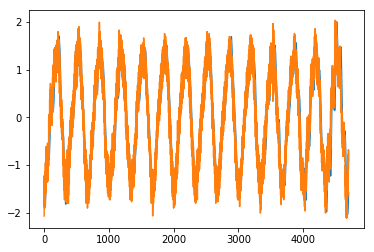

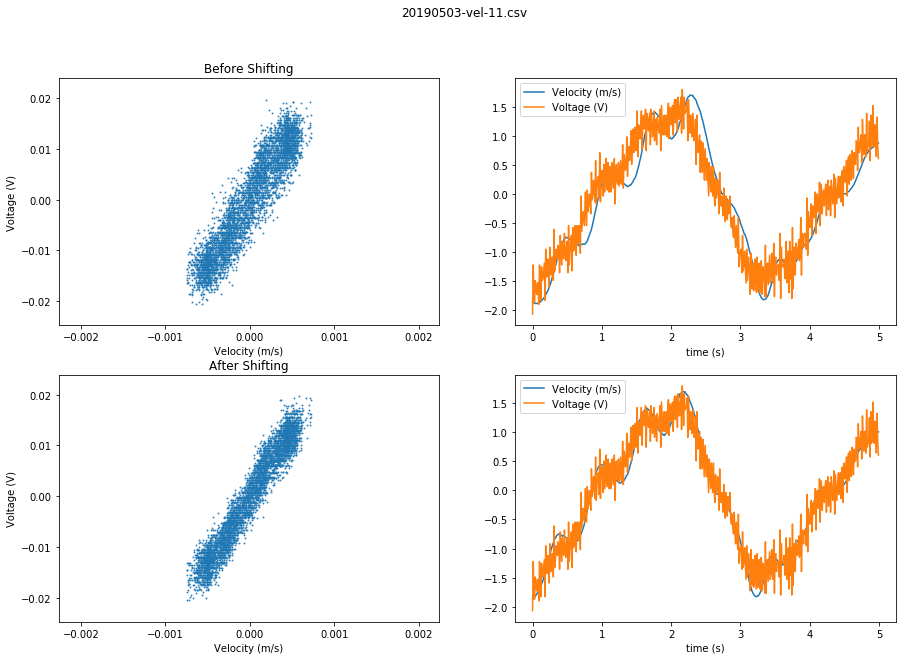

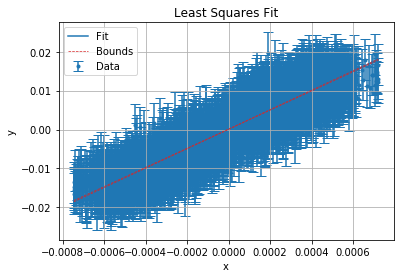

data/20190503-vel-12.csv
[8.62 8.62 8.62 ... 8.66 8.66 8.66]
[0.00862 0.00862 0.00862 ... 0.00866 0.00866 0.00866]
[0.00862 0.00862 0.00862 ... 0.00866 0.00866 0.00866]
shift: 12


{'shift': 12, 'mean_pos': 8.4898, 'slope': 2.5741e+01 +_ 1.2514e-01 None}

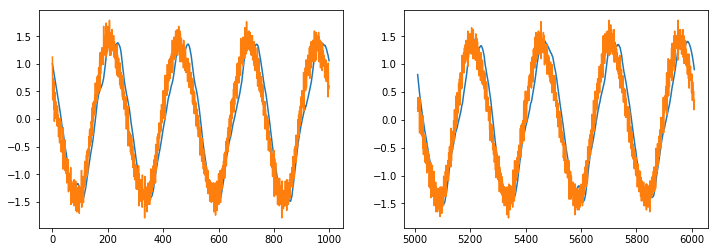

[8.62 8.62 8.62 ... 8.66 8.66 8.66]
[0.00862 0.00862 0.00862 ... 0.00866 0.00866 0.00866]
[0.00862 0.00862 0.00862 ... 0.00866 0.00866 0.00866]
shift: 12


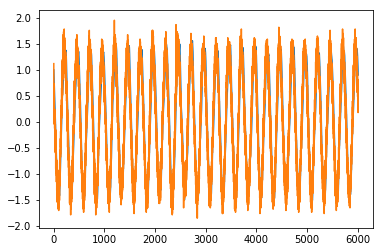

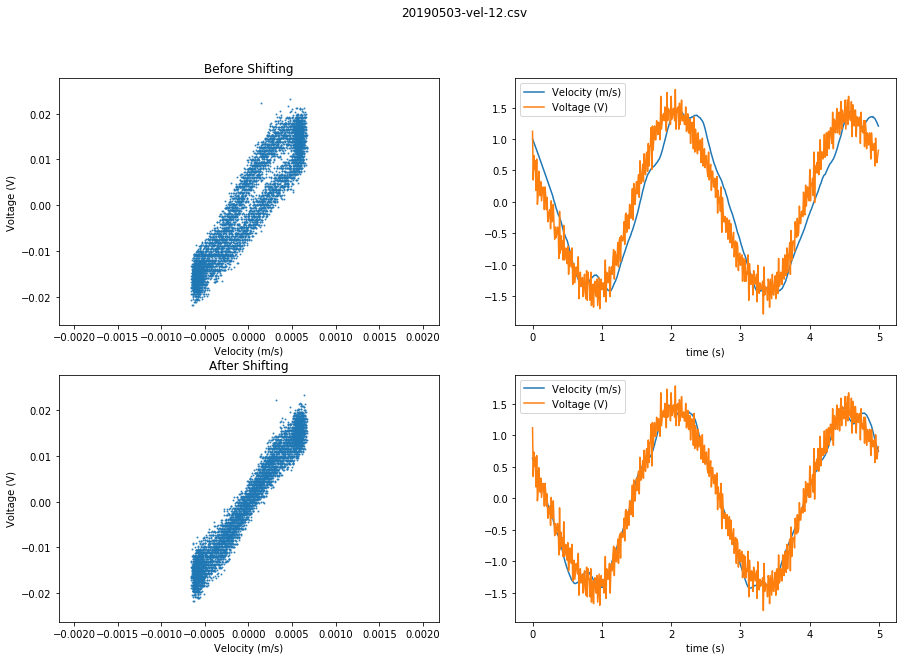

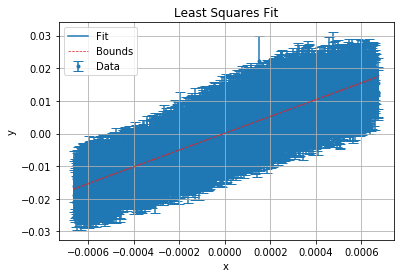

data/20190503-vel-13.csv
[8.36 8.36 8.37 ... 8.37 8.36 8.35]
[0.00836 0.00836 0.00837 ... 0.00837 0.00836 0.00835]
[0.00836 0.00836 0.00837 ... 0.00837 0.00836 0.00835]
shift: 10


{'shift': 10, 'mean_pos': 8.4463, 'slope': 2.5692e+01 +_ 1.6800e-01 None}

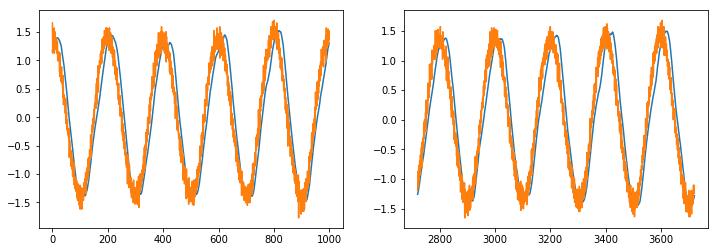

[8.36 8.36 8.37 ... 8.37 8.36 8.35]
[0.00836 0.00836 0.00837 ... 0.00837 0.00836 0.00835]
[0.00836 0.00836 0.00837 ... 0.00837 0.00836 0.00835]
shift: 10


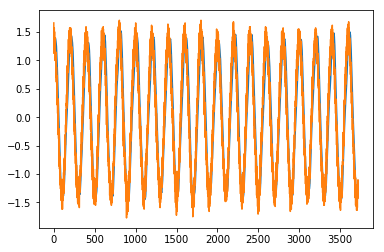

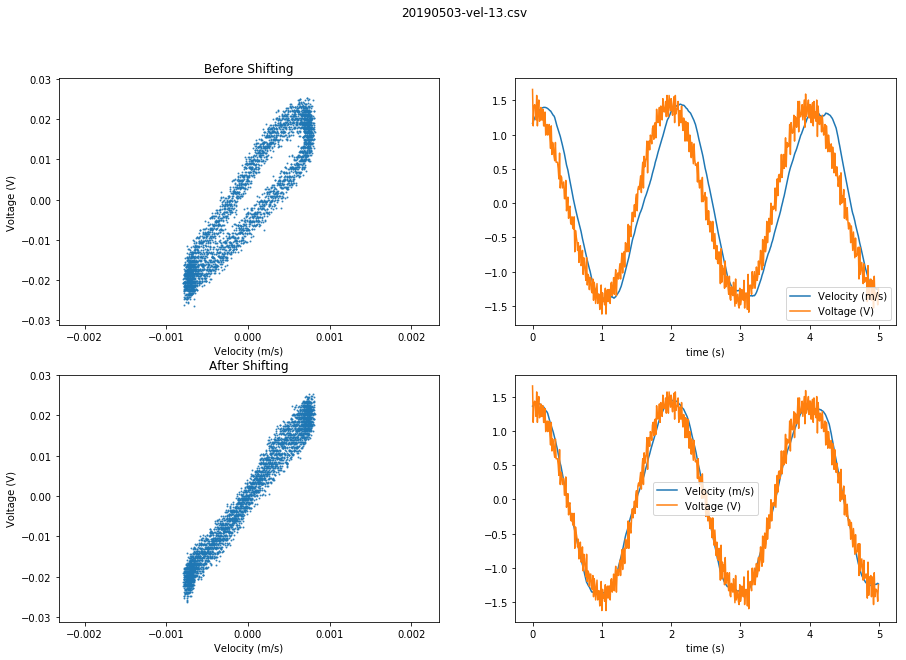

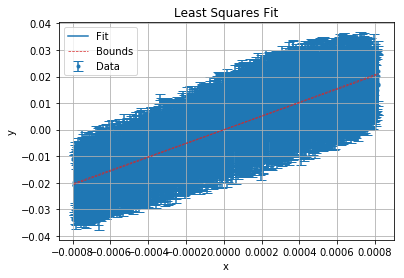

data/20190503-vel-14.csv
[8.3  8.3  8.28 ... 8.15 8.15 8.16]
[0.0083  0.0083  0.00828 ... 0.00815 0.00815 0.00816]
[0.0083  0.0083  0.00828 ... 0.00815 0.00815 0.00816]
shift: 12


{'shift': 12,
 'mean_pos': 8.477500000000001,
 'slope': 2.5150e+01 +_ 2.0901e-01 None}

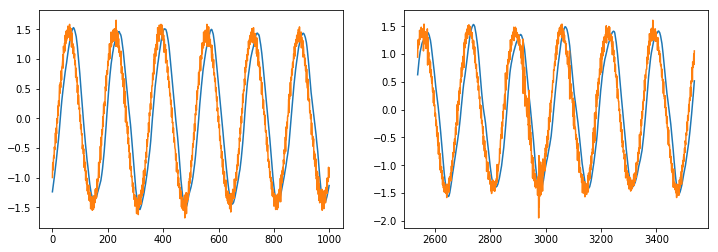

[8.3  8.3  8.28 ... 8.15 8.15 8.16]
[0.0083  0.0083  0.00828 ... 0.00815 0.00815 0.00816]
[0.0083  0.0083  0.00828 ... 0.00815 0.00815 0.00816]
shift: 12


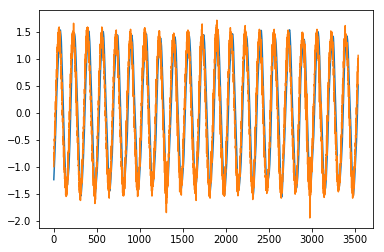

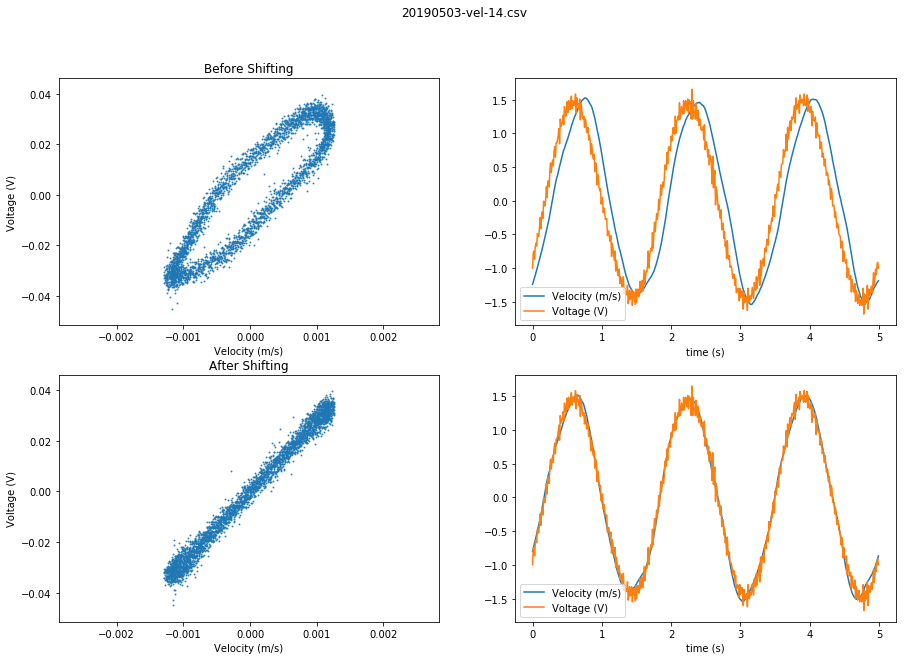

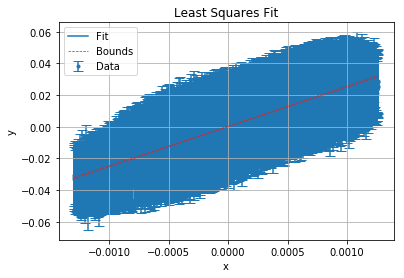

data/20190503-vel-15.csv
[8.44 8.42 8.4  ... 8.67 8.67 8.68]
[0.00844 0.00842 0.0084  ... 0.00867 0.00867 0.00868]
[0.00844 0.00842 0.0084  ... 0.00867 0.00867 0.00868]
shift: 11


{'shift': 11, 'mean_pos': 8.50225, 'slope': 2.5069e+01 +_ 2.3560e-01 None}

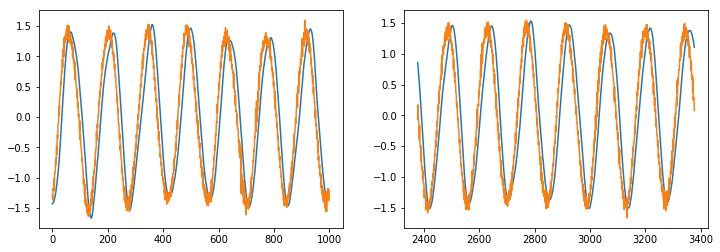

[8.44 8.42 8.4  ... 8.67 8.67 8.68]
[0.00844 0.00842 0.0084  ... 0.00867 0.00867 0.00868]
[0.00844 0.00842 0.0084  ... 0.00867 0.00867 0.00868]
shift: 11


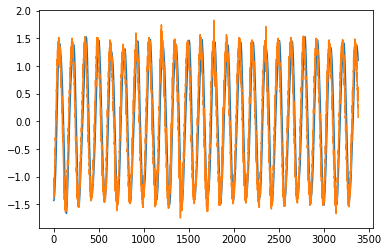

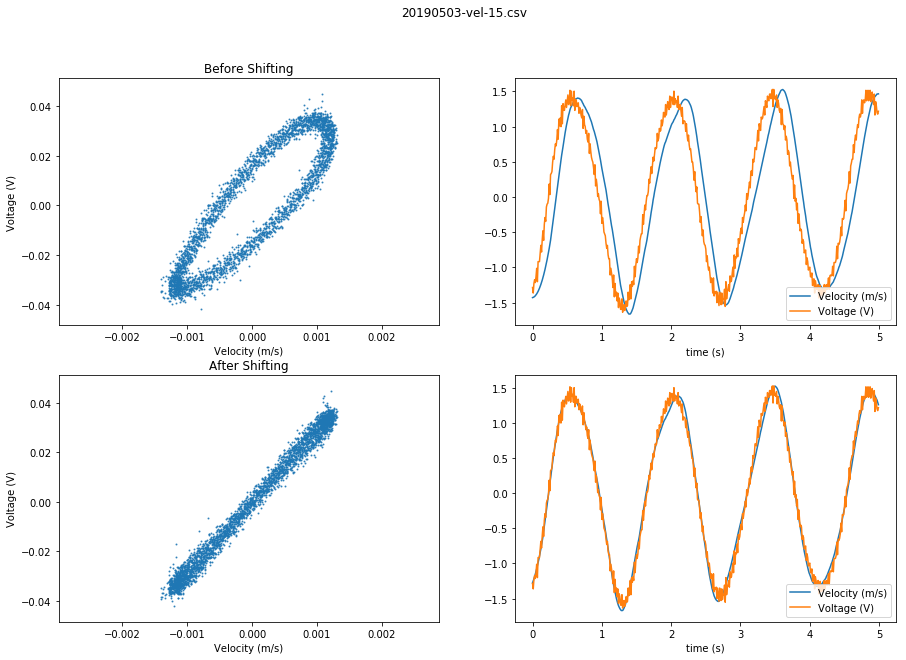

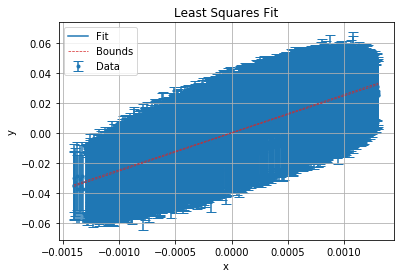

data/20190503-vel-16.csv
[8.62 8.62 8.62 ... 8.32 8.32 8.33]
[0.00862 0.00862 0.00862 ... 0.00832 0.00832 0.00833]
[0.00862 0.00862 0.00862 ... 0.00832 0.00832 0.00833]
shift: 12


{'shift': 12, 'mean_pos': 8.41405, 'slope': 2.4012e+01 +_ 2.6941e-01 None}

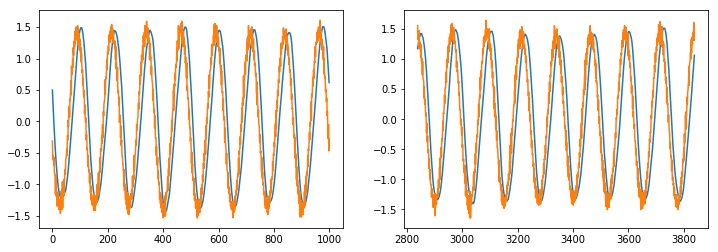

[8.62 8.62 8.62 ... 8.32 8.32 8.33]
[0.00862 0.00862 0.00862 ... 0.00832 0.00832 0.00833]
[0.00862 0.00862 0.00862 ... 0.00832 0.00832 0.00833]
shift: 12


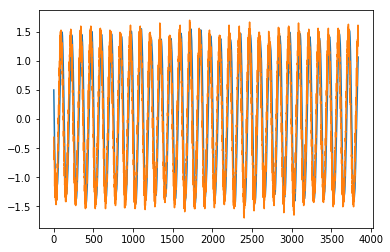

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/michael/Documents/College/jupyter/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-c1db2142bfe1>", line 23, in <module>
    V.process()
  File "/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py", line 404, in process
    plt.show()
  File "/home/michael/Documents/College/jupyter/venv/lib/python3.6/site-packages/matplotlib/pyplot.py", line 254, in show
    return _show(*args, **kw)
  File "/home/michael/Documents/College/jupyter/venv/lib/python3.6/site-packages/ipykernel/pylab/backend_inline.py", line 39, in show
    metadata=_fetch_figure_metadata(figure_manager.canvas.figure)
  File "/home/michael/Documents/College/jupyter/venv/lib/python3.6/site-packages/IPython/core/display.py", line 304, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  F

KeyboardInterrupt: 

In [14]:
data = []
for f in fnames:
    print(f)
    V = VelocityMode(f, [1,-1])
    V.data.process()
    V.summary()
    
    xy = V.data.stage1_norm
    fig = plt.figure(figsize=(12,4))
    
    ax = fig.add_subplot(121)
    i = np.arange(1000)
    ax.plot(i, xy[i,0])
    ax.plot(i, xy[i,1])
    
    ax = fig.add_subplot(122)
    i = xy.shape[0]
    i = np.arange(i-1000,i)
    ax.plot(i, xy[i,0])
    ax.plot(i, xy[i,1])
    plt.show()
    
    V.process()
    plt.show()
    
    

In [1]:
from pandas import DataFrame
from mxp_tools.fit import Model, Analysis, weighted_mean
from mxp_tools.labs.watt_balance import VelocityMode
import pandas
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

manifest = pandas.read_csv('data/manifest/velocity_manifest.csv')
fnames = []
list(manifest)
fnames = manifest.loc[manifest['use']==1][['Name', 'left', 'right']]

data = []
for row in fnames.iterrows():
    fname, left, right = list(row[1])
    V = VelocityMode('data/'+fname, [left, -right])
    V.data.process()
    summary = V.summary()
    data.append({
        'fname': fname,
        'mean_pos': summary['mean_pos'],
        'slope': summary['slope'].value,
        'slope_err': summary['slope'].err
    })
    
# data

data = DataFrame(data)

/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:173: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  position = data[0].as_matrix()
/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:174: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  voltage = data[2].as_matrix()
/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_raw = raw_data[1].as_matrix()
/home/michael/Documents/College/Phys_4052/jupyter/mxp-tools/mxp_tools/labs/watt_balance.py:189: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_raw = raw_data[3].as_matrix()


<ErrorbarContainer object of 3 artists>

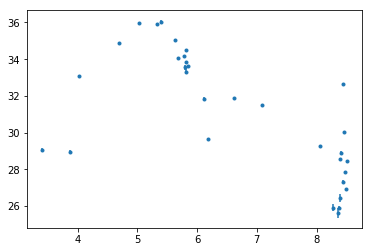

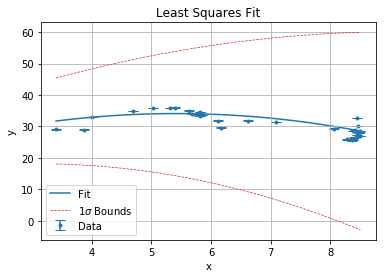

params [-0.58474137  6.33669038 16.92519928] param errors [0.13856097 1.83121982 5.81574637]
Reduced chi^2: 729.45
PTE: 1.0000


{'value': 28.539503253628297, 'err': 19.399080497583018, 'unit': None}

0.17349931141563718

<ErrorbarContainer object of 3 artists>

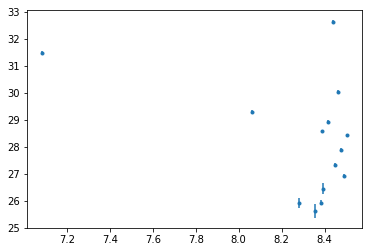

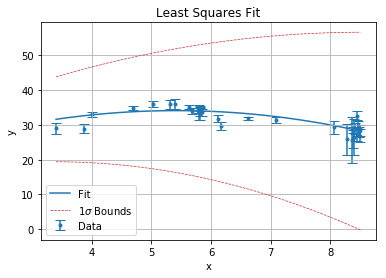

params [-0.6173775   6.6859402  16.01869209] param errors [0.12886568 1.64563221 5.11575138]
Reduced chi^2: 2.33
PTE: 0.9999


2.8244e+01 +_ 1.7565e+01 None

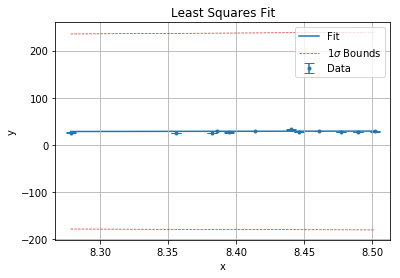

params [ 3.94637792 -4.33340858] param errors [ 12.38673021 104.51466786]
Reduced chi^2: 216.49
PTE: 1.0000


2.9211e+01 +_ 1.4835e+02 None

<ErrorbarContainer object of 3 artists>

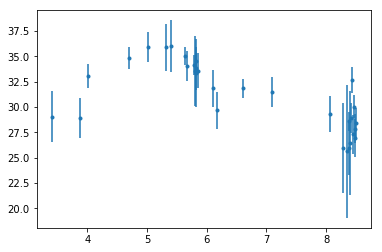

In [2]:
# data
xy = []
for row in data.iterrows():
    row = row[1]
    xy.append((row['mean_pos'], row['slope'], row['slope_err']))
# xy = [(item['mean_pos'], item['slope'].value, item['slope'].err) for item in data.iterrows()]
# x = [item['mean_pos'] for item in data]
# y = [item['slope'].value for item in data]
x, y, yerr = zip(*xy)
x = np.array(x)
y = np.array(y)
yerr = np.array(yerr)
plt.errorbar(x, y, yerr, fmt='.')
plt.show()

def fit(x, a, b, c):
    return a*x**2+b*x+c

def fit_err(x, params, param_errs):
    return np.sqrt(np.sum([
        (x**2*param_errs[0])**2,
        (x*param_errs[1])**2,
        (param_errs[2])**2
    ]))

analysis = Analysis.new(x, y, yerr, fit, error_function=fit_err)
# analysis = Analysis.new_2param(x[i], y[i], yerr[i])
analysis.plot(plt.figure().add_subplot(111))
plt.show()
print(analysis)
analysis.model.get_value(8.5).__dict__
(analysis.model(8.5)-24.32)/24.32


i = np.where(x>7)
plt.errorbar(x[i], y[i], yerr[i], fmt='.')
plt.show()

yerr2 = yerr.copy()
i = np.where(x>0)
yerr2[np.where(x<8)] *= 15
yerr2[np.where(x>=8)] *= 25
analysis = Analysis.new(x[i], y[i], yerr2[i], fit, error_function=fit_err)
# analysis = Analysis.new_2param(x[i], y[i], yerr[i])
analysis.plot(plt.figure().add_subplot(111))
plt.show()
print(analysis)
analysis.model.get_value(8.5)

i = np.where(x>8.1)
analysis = Analysis.new_2param(x[i], y[i], yerr[i]*2)
# analysis = Analysis.new_2param(x[i], y[i], yerr[i])
analysis.plot(plt.figure().add_subplot(111))
plt.show()
print(analysis)
analysis.model.get_value(8.5)

# (analysis.model.get_value(8.5)-24.32)/24.32

i = np.where(x>7.5)
plt.errorbar(x, y, yerr*25, fmt='.')
plt.show()

Text(0.5, 0, 'Center of Oscillation (mm)')

Text(0, 0.5, 'Measured BL Factor ($Vs/m$)')

Text(5.8, 24.5, 'Predicted BL @ 8.5: $26.2\\pm3.0$ $(Vs/m)$')

Text(0.5, 1.0, 'Velocity Mode Data')

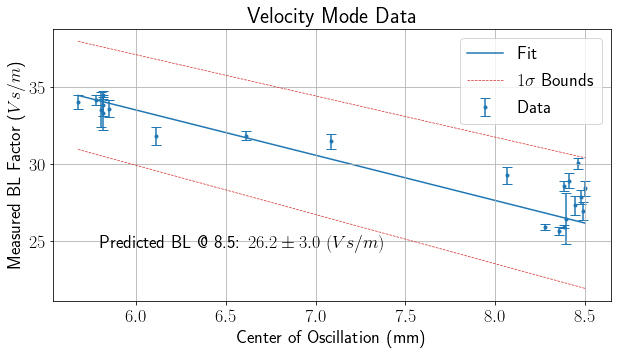

params [-2.946132   51.20520732] param errors [0.25972692 2.04704551]
Reduced chi^2: 16.06
PTE: 1.0000


2.6163e+01 +_ 3.0107e+00 None

(0.07578475938079196, 0.6121808251211397)

In [6]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})

i = np.where(x>7)
yerr2 = yerr.copy()*1
yerr2[np.where(y>26)] *= 8
i = x>5
i[np.where((x<5)&(y<30))] = False
i[np.where((x>8)&(y>32))] = False
i[np.where((x<7)&(y<30))] = False
i[np.where((y>35))] = False
# yerr2[np.where((x>8)&(y>32))] *= 20
# yerr2[np.where((x<5)&(y<30))]*= 4
# yerr2[np.where(x<8)] *= 10
# yerr2[np.where(x>=8)] *= 2

i = np.where(i)
# analysis = Analysis.new(x[i], y[i], yerr2[i], fit, error_function=fit_err)
analysis = Analysis.new_2param(x[i], y[i], yerr2[i])

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
analysis.plot(ax, plot_bounds=True)

ax.set_xlabel('Center of Oscillation (mm)')
ax.set_ylabel('Measured BL Factor ($Vs/m$)')
bl = analysis.model.get_value(8.5)
bl = '{:.1f}\\pm{:.1f}'.format(bl.value, bl.err)
ax.text(5.8, 24.5, 'Predicted BL @ 8.5: $%s$ $(Vs/m)$' % bl, {'size': 18})
ax.set_title('Velocity Mode Data')
plt.show()
print(analysis)
analysis.model.get_value(8.5)
analysis.model.get_value(8.5).eval(24.32)

2.8985e+01 +_ 3.1992e-04 None

(0.1918072424647037, 14581.001059876755)

32.64344842599677

0.05218458760151628

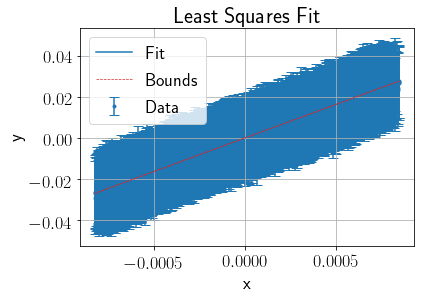

In [6]:
i = np.where(x>8)
bl = weighted_mean(y[i], yerr[i])
bl
bl.eval(24.32)
# data.loc[(data['slope']<33)&(data['mean_pos']<8)]
# data.loc[(data['slope']>40)&(data['mean_pos']<8)]
V.data.analysis.plot(plt.figure().add_subplot(111))
V.data.analysis.model.params[0]
V.data.analysis.model.param_errs[0]